# Outcome explorer

In [52]:
import pandas as pd
from datetime import datetime
import pm4py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data loading

In [53]:
'''
INPUT_FILE_NAME_BERLIN = 'cases_berlin-preprocessed-gesetzgebung-2006-2020_with_context.csv'
INPUT_FILE_NAME_BRANDENBURG = 'cases_brandenburg-preprocessed-gesetzgebung-2006-2020_processed_with_context.csv'
INPUT_FILE_NAME_BAWUE = 'cases_baden-württemberg-preprocessed-gesetzgebung-gesetz-2006-2020_processed_with_context.csv'
'''

INPUT_FILE_NAME_BERLIN = 'cases_berlin-preprocessed-gesetzgebung-2006-2020_with_context_passed_bills.csv'
INPUT_FILE_NAME_BRANDENBURG = 'cases_brandenburg-preprocessed-gesetzgebung-2006-2020_processed_with_context_passed_bills.csv'
INPUT_FILE_NAME_BAWUE = 'cases_baden-württemberg-preprocessed-gesetzgebung-gesetz-2006-2020_processed_with_context_passed_bills.csv'

def read_and_sanitize(file_name):
    df = pd.read_csv(file_name)
    print('Read', len(df), 'rows from', file_name)
    df = df.dropna(axis=1, how='all')  # drop all completely empty columns
    return df

df_berlin = read_and_sanitize(INPUT_FILE_NAME_BERLIN)
df_brandenburg = read_and_sanitize(INPUT_FILE_NAME_BRANDENBURG)
df_baWue = read_and_sanitize(INPUT_FILE_NAME_BAWUE)

Read 550 rows from cases_berlin-preprocessed-gesetzgebung-2006-2020_with_context_passed_bills.csv
Read 439 rows from cases_brandenburg-preprocessed-gesetzgebung-2006-2020_processed_with_context_passed_bills.csv
Read 312 rows from cases_baden-württemberg-preprocessed-gesetzgebung-gesetz-2006-2020_processed_with_context_passed_bills.csv


## Idea for outcomes

To understand what the cause of slower processes in Berlin than in BaWue is, we could try to find causes for processes taking longer than the average in BaWue. \
So outcomes: slower than BaWue-average +10% tolerance (delayed), faster than BaWue-average (in time)

In [54]:
# formalize each possible outcome as a property of the cases

bawue_average_cycle_time = df_baWue["duration"].mean()
print("BaWue average cycle time: ", bawue_average_cycle_time)

## do the same as above but with the tolerance idea
bawue_average_cycle_tolerance = bawue_average_cycle_time + 0.1*bawue_average_cycle_time
print("BaWue average cycle time with tolerance: ", bawue_average_cycle_tolerance)

df_berlin["slower_than_bawue_avg"] = df_berlin.apply(lambda x: x["duration"] > bawue_average_cycle_tolerance, axis=1)
df_brandenburg["slower_than_bawue_avg"] = df_brandenburg.apply(lambda x: x["duration"] > bawue_average_cycle_tolerance, axis=1)
df_baWue["slower_than_bawue_avg"] = df_baWue.apply(lambda x: x["duration"] > bawue_average_cycle_tolerance, axis=1)


BaWue average cycle time:  91.53205128205128
BaWue average cycle time with tolerance:  100.68525641025641


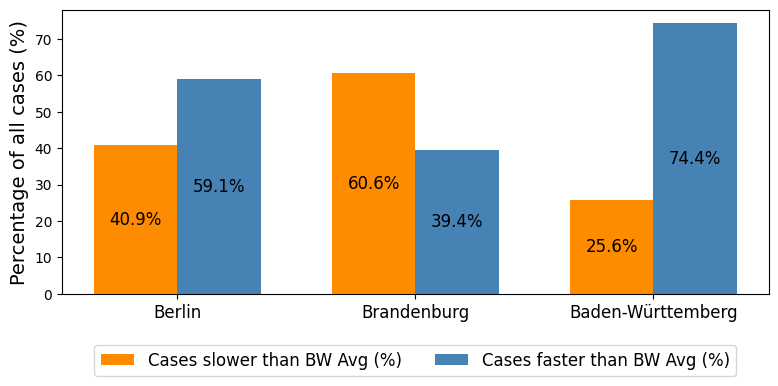

In [55]:
# Calculate the percentage of cases that are slower than Baden-Württemberg average
berlin_slower_percent = df_berlin["slower_than_bawue_avg"].mean() * 100
brandenburg_slower_percent = df_brandenburg["slower_than_bawue_avg"].mean() * 100
bawue_slower_percent = df_baWue["slower_than_bawue_avg"].mean() * 100

# Set up the data
states = ['Berlin', 'Brandenburg', 'Baden-Württemberg']
slower_percentages = [berlin_slower_percent, brandenburg_slower_percent, bawue_slower_percent]
faster_percentages = [100 - p for p in slower_percentages]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar positions
x = np.arange(len(states))
width = 0.35  # Width of the bars

# Use orange for slower and blue for faster consistently across all states
orange_color = '#ff8c00'  # Orange for "slower than average"
blue_color = '#4682b4'    # Blue for "faster than average"

# Create the bars with gaps
rects1 = ax.bar(x - width/2, slower_percentages, width, label='Cases slower than BW Avg (%)', color=orange_color)
rects2 = ax.bar(x + width/2, faster_percentages, width, label='Cases faster than BW Avg (%)', color=blue_color)

# Add text annotations
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height/2,
           f'{height:.1f}%', ha='center', va='center', fontsize=12)
            
for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height/2,
           f'{height:.1f}%', ha='center', va='center', fontsize=12)

# Customize the chart
ax.set_ylabel('Percentage of all cases (%)', fontsize=14)
ax.set_xlabel('')
ax.set_xticks(x)
ax.set_xticklabels(states, fontsize=12)

# Position the legend outside the plot area
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)


# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('cases_faster_slower_than_bawue_avg.png', dpi=300)
plt.show()

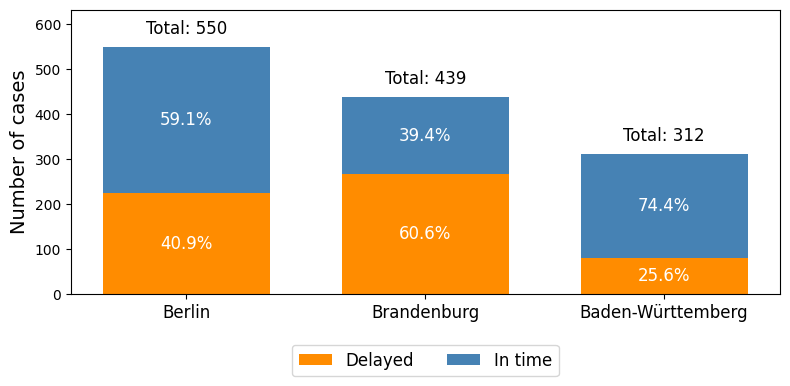

Berlin: 225 cases slower, 325 cases faster
Brandenburg: 266 cases slower, 173 cases faster
Baden-Württemberg: 80 cases slower, 232 cases faster


In [56]:
# Calculate the percentage of cases that are slower than Baden-Württemberg average
berlin_slower_percent = df_berlin["slower_than_bawue_avg"].mean() * 100
brandenburg_slower_percent = df_brandenburg["slower_than_bawue_avg"].mean() * 100
bawue_slower_percent = df_baWue["slower_than_bawue_avg"].mean() * 100

# Set up the data
states = ['Berlin', 'Brandenburg', 'Baden-Württemberg']
slower_percentages = [berlin_slower_percent, brandenburg_slower_percent, bawue_slower_percent]
faster_percentages = [100 - p for p in slower_percentages]

# Get the total number of cases for each state
total_cases_berlin = len(df_berlin)
total_cases_brandenburg = len(df_brandenburg)
total_cases_bawue = len(df_baWue)
total_cases = [total_cases_berlin, total_cases_brandenburg, total_cases_bawue]

# Calculate absolute numbers
slower_absolutes = [df_berlin["slower_than_bawue_avg"].sum(), df_brandenburg["slower_than_bawue_avg"].sum(), df_baWue["slower_than_bawue_avg"].sum()]
faster_absolutes = [total_cases_berlin - slower_absolutes[0], total_cases_brandenburg - slower_absolutes[1], total_cases_bawue - slower_absolutes[2]]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar positions
x = np.arange(len(states))
width = 0.7  # Width of the bars

# Use orange for slower and blue for faster consistently across all states
orange_color = '#ff8c00'  # Orange for "slower than average"
blue_color = '#4682b4'    # Blue for "faster than average"

# Create stacked bars
bars_slower = ax.bar(x, slower_absolutes, width, label='Delayed', color=orange_color)
bars_faster = ax.bar(x, faster_absolutes, width, bottom=slower_absolutes, label='In time', color=blue_color)

# Add text annotations with percentages
for i, rect in enumerate(bars_slower):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height/2,
           f'{slower_percentages[i]:.1f}%', ha='center', va='center', fontsize=12, color='white')
            
for i, rect in enumerate(bars_faster):
    height = rect.get_height()
    bottom = rect.get_y()
    ax.text(rect.get_x() + rect.get_width()/2, bottom + height/2,
           f'{faster_percentages[i]:.1f}%', ha='center', va='center', fontsize=12, color='white')

# Add total case count on top of each bar
for i, total in enumerate(total_cases):
    ax.text(i, total + 20, f'Total: {int(total)}', ha='center', va='bottom', fontsize=12)

# Customize the chart
ax.set_ylabel('Number of cases', fontsize=14)
ax.set_xlabel('')
ax.set_xticks(x)
ax.set_xticklabels(states, fontsize=12)

# Position the legend outside the plot area
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Add some padding to y-axis to make room for total case labels
ax.set_ylim(0, max(total_cases) * 1.15)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('cases_faster_slower_than_bawue_avg_absolute.png', dpi=300)
plt.show()

# Print the counts of cases
for state, slower, faster in zip(states, slower_absolutes, faster_absolutes):
    print(f"{state}: {int(slower)} cases slower, {int(faster)} cases faster")